In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train = pd.read_csv("titanic_train.csv")

# Análise de dados

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


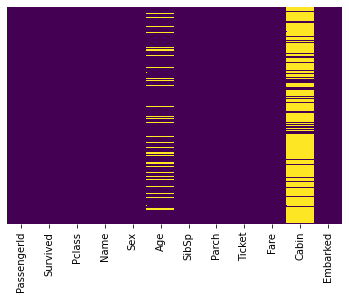

In [ ]:
 sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [ ]:
sns.set_style('whitegrid')

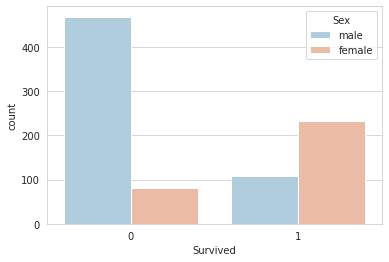

In [ ]:
sns.countplot(x='Survived', data = train, hue='Sex', palette='RdBu_r')

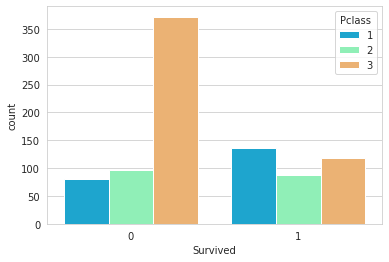

In [ ]:
sns.countplot(x='Survived', data = train, hue='Pclass', palette='rainbow')

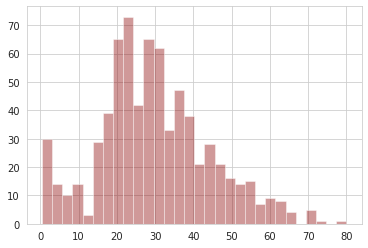

In [ ]:
train['Age'].hist(bins = 30, color = "darkred", alpha = 0.4)

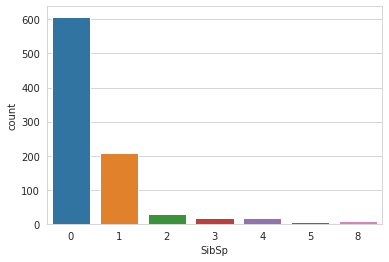

In [ ]:
sns.countplot(x='SibSp', data=train)

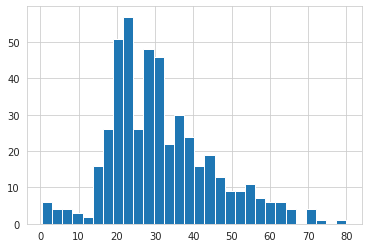

In [ ]:
train[train['SibSp'] == 0]['Age'].hist(bins = 30)

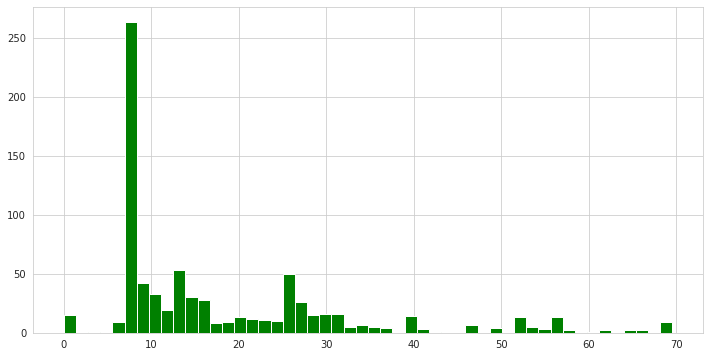

In [ ]:
train[train['Fare'] < 70]['Fare'].hist(color='green', bins=50, figsize=(12,6))

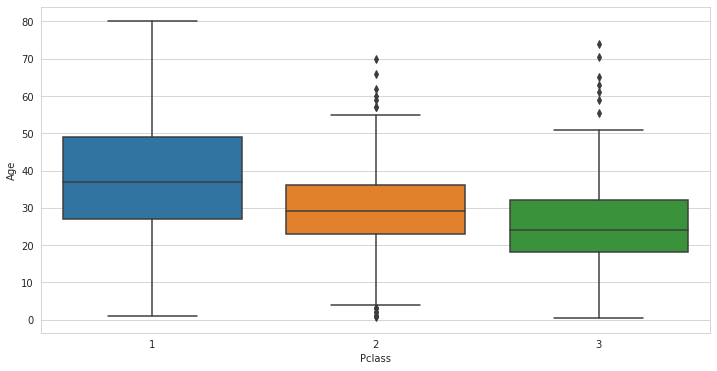

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=train)

# Pré-processamento

In [ ]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade        

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(inputar_idade,axis=1)

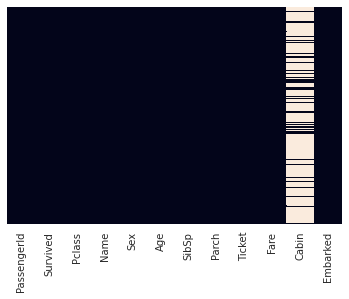

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [ ]:
del train['Cabin']
#train.drop('Cabin', inplace=True)

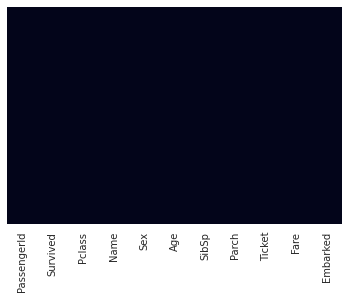

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [ ]:
train.dropna(inplace=True) #essa funcao por padrao tem axis = 0 (eixo 0)
#se eu colocasse axis = 1, apagaria a coluna do embarked inteira

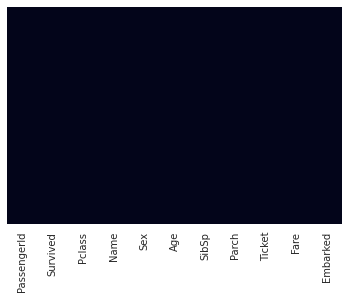

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [ ]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [ ]:
train = pd.concat([train, sex, embark], axis = 1)

In [ ]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Aplicação dos classificadores

In [ ]:
pipeline_lr = Pipeline(steps=[('lr_scalar', StandardScaler()),
                              ('lr_classificador', LogisticRegression(max_iter=1200000))
])

In [ ]:
pipeline_svm = Pipeline(steps=[('svm_scalar', StandardScaler()),
                       ('svm_classificador', SVC())
])

In [ ]:
pipeline_nb = Pipeline(steps=[('nb_scalar', StandardScaler()),
                       ('nb_classificador', GaussianNB())
])

In [ ]:
pipeline_rf = Pipeline(steps=[('rf_scalar', StandardScaler()),
                       ('rf_classificador', RandomForestClassifier())
])

In [ ]:
pipeline_knn = Pipeline(steps=[('knn_scalar', StandardScaler()),
                       ('knn_classificador', KNeighborsClassifier(n_neighbors=5))
])

In [ ]:
pipelines = [pipeline_lr, pipeline_svm, pipeline_nb, pipeline_rf, pipeline_knn]
pip_dict = {0:'Logistic Regression', 1:'Support Vector Machine', 2:'Naive Bayes', 3:'Random Forest', 4:'K-Nearest Neighbor'}

In [ ]:
melhor_acuracia = 0.0
melhor_classificador = 0
melhor_pipeline = ""

# Holdout Validation

In [ ]:
#fit dos pipelines
for pip in pipelines:
  pip.fit(X_train, y_train)

In [ ]:
for i, model in enumerate(pipelines):
  print("Teste de acurácia do {}: {}".format(pip_dict[i], model.score(X_test, y_test)))

Teste de acurácia do Logistic Regression: 0.8277153558052435
Teste de acurácia do Support Vector Machine: 0.846441947565543
Teste de acurácia do Naive Bayes: 0.8052434456928839
Teste de acurácia do Random Forest: 0.8202247191011236
Teste de acurácia do K-Nearest Neighbor: 0.8239700374531835


In [ ]:
for i, model in enumerate(pipelines):
  if(model.score(X_test, y_test) > melhor_acuracia):
    melhor_acuracia = model.score(X_test, y_test)
    melhor_pipeline = model
    melhor_classificador = i
print("Classificador com melhor acurácia: {}".format(pip_dict[melhor_classificador]))

Classificador com melhor acurácia: Support Vector Machine


# Cross Validation

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)

for i, pip in enumerate(pipelines):
  resultado = cross_validate(pip, X_train, y_train, cv=kfold)
  print("Média da acurácia do %s: %f (%f)" %(pip_dict[i], resultado['test_score'].mean(), resultado['test_score'].std()))

Média da acurácia do Logistic Regression: 0.787916 (0.054603)
Média da acurácia do Support Vector Machine: 0.810497 (0.050346)
Média da acurácia do Naive Bayes: 0.778341 (0.049102)
Média da acurácia do Random Forest: 0.800794 (0.034378)
Média da acurácia do K-Nearest Neighbor: 0.812135 (0.042418)
